# Group 3 Project, Part 2- Newsmakers Network

In [ ]:
# These paackages were required to by installed on the local machine, this may vary depending on your setup.
# !pip install NLTK
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !python -m spacy download en
# !pip install torch
# !pip install transformers
# !pip install networkx
# !pip install plotly
# !pip install spacy-transformers

In [1]:
# For section 2:
# !pip install spacy-transformers
import numpy as np
import pandas as pd
import spacy
# import spacy_transformers
spacy.cli.download("en_core_web_trf")

ModuleNotFoundError: No module named 'spacy'

Below we import neccesary python libraries and creating the pickle backup function so that our datasets won't need to be recreated each time.

In [4]:
import numpy as np
import pandas as pd
import json
import datetime as dt
import plotly.offline as py
import plotly.graph_objects as go

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
import pickle
def save(filename, *args):
    # Get global dictionary
    glob = globals()
    d = {}
    for v in args:
        # Copy over desired values
        d[v] = glob[v]
    with open(filename, 'wb') as f:
        # Put them in the file
        pickle.dump(d, f)

def load_pckl(filename):
    # Get global dictionary
    glob = globals()
    with open(filename, 'rb') as f:
        for k, v in pickle.load(f).items():
            # Set each global variable to the value from the file
            glob[k] = v

### 1. Preprocessing Steps

The dataset originally comes from https://www.kaggle.com/datasets/hadasu92/cnn-articles. Below we will preprocess the text so that it is ready for Named Entity Recognition and we will do some basic EDA steps to understand the dataset better.

In [13]:
cnn_20_3 = pd.read_csv("CNN_Articles_raw.csv")
cnn_20_3.head()

,Unnamed: 0,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,0,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
2,2,"Stephanie Bailey, CNN",2021-05-12T07:52:09Z,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
3,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16T02:51:30Z,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
4,4,"Paul R. La Monica, CNN Business",2022-03-15T09:57:36Z,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."


In [14]:
# For section 2:
data = pd.read_csv("CNN_Articles_raw.csv", index_col= 0)
data.head()

,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
2,"Stephanie Bailey, CNN",2021-05-12T07:52:09Z,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16T02:51:30Z,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
4,"Paul R. La Monica, CNN Business",2022-03-15T09:57:36Z,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."


In [ ]:
print(cnn_20_3.shape[0])

9308


In [ ]:
cnn_20_3['date_published'] = pd.to_datetime(cnn_20_3['date_published'])
cnn_20_3.head()

,Unnamed: 0,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59+00:00,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Jacopo Prisco, CNN",2021-07-15 02:46:59+00:00,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
2,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09+00:00,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
3,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30+00:00,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
4,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36+00:00,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."


In [ ]:
newest = cnn_20_3['date_published'].max()
newest = newest.date()
oldest = cnn_20_3['date_published'].min()
oldest = oldest.date()
count = (cnn_20_3.shape[0])
print(f'The latest publish date for an article in this DF is {newest}')
print(f'The earliest publish date for an article in this DF is {oldest}')
print(f'The number of articles in this dataset is {count}')

The latest publish date for an article in this DF is 2022-03-15
The earliest publish date for an article in this DF is 2012-12-06
The number of articles in this dataset is 9308


We see that our news article corpus is composed of text articles form December 2012 to March 2022. Next we will print a sample of one of the text articles for reference.

In [ ]:
print(len(cnn_20_3['text'][0]))
print(cnn_20_3['text'][0])

12361
 (CNN)Right now, there's a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world's largest truck manufacturers -- Navistar in the US and Traton, Volkswagen's trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world's first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to se

Next we will create a corpus using just the article text column. We will also rename the 'Unnamed: 0' column which is a unique identifier for the articles to 'art_id' which will make this our identifier for articles going forward.

In [ ]:
corpus = cnn_20_3['text']

In [ ]:
print(len(corpus))

9308


In [ ]:
cnn_20_3.rename(columns = {'Unnamed: 0':'art_id'}, inplace = True)
print(len(pd.unique(cnn_20_3['art_id'])))

9308


In the cell below we implement removal of upercase, special charecters and whitespace, tokenization, and lementization.

In [ ]:
import nltk
from nltk.stem import PorterStemmer
import re
import numpy as np
from nltk.tokenize import word_tokenize
from functools import reduce
import spacy
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
nltk.download('punkt')

news_corp = np.array(corpus)
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(news_corp)

# lementization on the corpus
news_corpus = []
for w in norm_corpus:
  tokenize_w = nlp(str(w))
  stemmed_sentence = reduce(lambda x, y: x + " " + y.lemma_, tokenize_w, "")
  news_corpus.append(stemmed_sentence)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pvste\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pvste\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(len(news_corpus))
print(len(news_corpus[0]))

9308
8815


We can see that our corpus is comprised of 9308 independent articles and the length of the first article is 8815 words. Next we will re-attach the corpus to the article ID numbers so we hvave that available for the next processing steps.

In [ ]:
#rebuild our article_df

article_df = pd.DataFrame(list(zip(cnn_20_3['art_id'], news_corp)), columns=['art_id', 'text'])


In [ ]:
article_df.head(20)

,art_id,text
0,0,"(CNN)Right now, there's a shortage of truck d..."
1,1,"(CNN)Right now, there's a shortage of truck d..."
2,2,(CNN)Working in a factory or warehouse can me...
3,3,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
4,4,"New York (CNN Business)For many years, the wor..."
5,5,"New York (CNN Business)For many years, the wor..."
6,6,"New York (CNN Business)For many years, the wor..."
7,7,The European Union formally approved on Tuesda...
8,8,(CNN Business)A woman holding a sign reading ...
9,9,New York (CNN Business)Fox News correspondent ...


## 2. Feature Extraction

### Part A. Implimenting Named Entity Recognition with Bert Tranformer

Below we used the transformers library to impliment a BERT based model in order to perform Named Entity Recognition. We then needed to post process the NER dataframe to create a more useful and human readable dataset.

In [ ]:
# Create a subset for testing speed.
# article_subset = article_df.sample(100)

In [ ]:
# article_subset.head(10)

In [ ]:
from concurrent.futures import ThreadPoolExecutor
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification
import pandas as pd

tokenizer = AutoTokenizer.from_pretrained("Jorgeutd/bert-large-uncased-finetuned-ner")
model = AutoModelForTokenClassification.from_pretrained("Jorgeutd/bert-large-uncased-finetuned-ner")

def process_article(row_tuple):
    row_dict = row_tuple._asdict()
    ner_pipeline = pipeline('ner', model=model, tokenizer=tokenizer)

    # Ensure entities are not empty
    try:
        entities = ner_pipeline(row_dict['text'])
    except:
        pass

    return [(row_dict['art_id'], entity.get('word', ''), entity.get('entity', '')) for entity in entities]

def perform_ner_parallel(article_df):
    with ThreadPoolExecutor() as executor:
        results = list(executor.map(process_article, article_df.itertuples(index=False)))

    art_id, tokenized_words, labels = zip(*[item for sublist in results for item in sublist])
    return list(art_id), list(tokenized_words), list(labels)


art_id, tokenized_words, labels = perform_ner_parallel(article_df)
ner_df = pd.DataFrame({'art_id': art_id, 'named_entity': tokenized_words, 'label': labels})
ner_df.head(20)



,art_id,named_entity,label
0,0,cnn,B-ORG
1,0,us,B-LOC
2,0,san,B-MISC
3,0,diego,I-MISC
4,0,-,I-MISC
5,0,based,I-MISC
6,0,tu,B-ORG
7,0,##si,B-ORG
8,0,##mple,B-ORG
9,0,tu,B-ORG


Backup variables

In [ ]:
#backup dataframe variables
save("backup", "article_df", 'ner_df')

#Load backup if needed
# load_pckl("backup")

Next we will need to create a df of persons in our dataframe and then find the comentions of each so we can weight each pair.

In [ ]:
ner_df.head(40)

,art_id,named_entity,label
0,0,cnn,B-ORG
1,0,us,B-LOC
2,0,san,B-MISC
3,0,diego,I-MISC
4,0,-,I-MISC
5,0,based,I-MISC
6,0,tu,B-ORG
7,0,##si,B-ORG
8,0,##mple,B-ORG
9,0,tu,B-ORG


Below we combine rows that start with ## with the previous row. Bert handles words that it does not recognize by breaking them into word segments and taking a best guess at the NER tag for each segment. In the output above an example is an organization called tusimple which is in lines 6, 7, and 8 as well as 9.10 and 11. After running the function below we see the output below where those rows have been condensed to rows 6 and 7 and properly labeled with B-ORG.

In [ ]:

def combine_names(df):
    result_df = df.copy(deep = True)
    index = 0
    while index < len(result_df)-1:
        if result_df.at[index, 'named_entity'] is not None:
            if result_df.at[index, 'named_entity'].startswith('##'):
                if index > 0:
                    result_df.at[index-1, 'named_entity'] = result_df.at[index-1, 'named_entity'] + result_df.at[index, 'named_entity'][2:]
                result_df = result_df.drop(index).reset_index(drop=True)
            else:
                index += 1
        else:
            index += 1
    return result_df

comb_ner_df = combine_names(ner_df)
comb_ner_df.head(10)

,art_id,named_entity,label
0,0,cnn,B-ORG
1,0,us,B-LOC
2,0,san,B-MISC
3,0,diego,I-MISC
4,0,-,I-MISC
5,0,based,I-MISC
6,0,tusimple,B-ORG
7,0,tusimple,B-ORG
8,0,us,B-LOC
9,0,china,B-LOC


In [ ]:
comb_ner_df.loc[6]

art_id                 0
named_entity    tusimple
label              B-ORG
Name: 6, dtype: object

In [ ]:
#backup dataframe variables
save("backup_2", "article_df", 'ner_df', 'comb_ner_df')

#Load backup if needed
# load_pckl("backup")

In the next section we will combine multi word entities into the proper phrasology. Bert handles these types of entities with a label of B- for the begining of a multi word entity and I- for the subsiquent sections of the phrase.

In [ ]:

comb_ner_df = comb_ner_df.reset_index(drop=True)

def combine_tags(df):
    new_df = df.copy(deep = True)
    index=0
    while index < len(new_df) - 1:
        current_label = new_df.at[index, 'label']
        next_label = new_df.at[index + 1, 'label']

        if (
            current_label is not None
            and next_label is not None
            and len(current_label) > 0
            and len(next_label) > 0
        ):
            if (
                current_label.startswith('B-')
                and current_label[2:] == next_label[2:]
                and next_label.startswith('I-')
            ):

                new_df.at[index+1, 'named_entity'] = (
                    new_df.at[index, 'named_entity']
                    + ' '
                    + new_df.at[index + 1, 'named_entity']
                )
                new_df.at[index + 1, 'label'] = new_df.at[index, 'label']
                new_df = new_df.drop(index).reset_index(drop=True)

            else:
                index += 1
        else:
            index += 1

    for idx, row in new_df.iterrows():
        if 'ORG' in row['label']:
            new_df.at[idx, 'label'] = 'organization'
        elif 'MISC' in row['label']:
            new_df.at[idx, 'label'] = 'Misc'
        elif 'LOC' in row['label']:
            new_df.at[idx, 'label'] = 'Location'
        elif 'PER' in row['label']:
            new_df.at[idx, 'label'] = 'Person'

    return new_df

merged_ner = combine_tags(comb_ner_df)
merged_ner.head(20)

,art_id,named_entity,label
0,0,cnn,organization
1,0,us,Location
2,0,san diego - based,Misc
3,0,tusimple,organization
4,0,tusimple,organization
5,0,us,Location
6,0,china,Location
7,0,europe,Location
8,0,tusimple,organization
9,0,navistar,organization


We have some rows that contain punctuation so we need to remove those rows and remove other punctuation marks. This is probably due to the fact that there may have been some punctuation embedded in our corpus words that were not removed during pre-processing. We may want to reevaluate how to deal with this earlier for efficiency.

In [ ]:
import re
p = re.compile(r'[^\w\s]+')
merged_ner['named_entity'] = [p.sub('', x) for x in merged_ner['named_entity'].tolist()]
print(merged_ner.shape[0])

297224


In [ ]:
merged_ner = merged_ner[merged_ner['named_entity'].notna() & (merged_ner['named_entity'].astype(str).str.strip() != '')]
print(merged_ner.shape[0])

289968


In [7]:
#backup dataframe variables
# save("backup_3", "article_df", 'ner_df', 'comb_ner_df', 'merged_ner')

#Load backup if needed
load_pckl("backup_3")

### Part B Named Entity Recognition with Spacey large model

In [15]:
# Section 2 : spacy implementation
# spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")
to_ner = data.columns[5:]
row_check = data.loc[[0]]
row_check

,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,"Jacopo Prisco, CNN",2021-07-15T02:46:59Z,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."


In [16]:
# ner using spacy's large model
for i in to_ner:
  text = row_check[i][0]
  doc = nlp(text)
  for ent in doc.ents:
    print(ent.text, ent.label_)

TuSimple PERSON
CNN ORG
TuSimple PERSON
CNN ORG
TuSimple PERSON
CNN)Right GPE
US GPE
One CARDINAL
first ORDINAL
San Diego GPE
TuSimple PERSON
2015 DATE
TuSimple PERSON
about 2 million miles QUANTITY
70 CARDINAL
US GPE
China GPE
Europe LOC
TuSimple PERSON
two CARDINAL
Navistar ORG
US GPE
Traton GPE
Volkswagen ORG
Europe LOC
2024 DATE
The Yara Birkeland ORG
first ORDINAL
zero CARDINAL
first ORDINAL
two CARDINAL
Norwegian NORP
the end of the year DATE
1 CARDINAL
13 CARDINAL
Oceanbird NORP
90% PERCENT
2 CARDINAL
13 CARDINAL
Norwegian NORP
Zeabuz PRODUCT
3 CARDINAL
13 CARDINAL
China GPE
Maglev GPE
Qingdao GPE
China GPE
Shandong Province GPE
July 20 DATE
600 km per hour QUANTITY
4 CARDINAL
13 CARDINAL
up to 1,000 kilometers QUANTITY
620 miles QUANTITY
Hyperloop ORG
Dutch NORP
Hardt PERSON
Hyperloop PRODUCT
Europe LOC
2022.Hide Caption 5 CARDINAL
13 CARDINAL
Hyperloop PRODUCT
XP-2 PRODUCT
6 CARDINAL
13 CARDINAL
Delft GPE
University of Technology ORG
Netherlands GPE
Dutch NORP
KLM ORG
20% PERC

In [17]:
# ner using spacy's large model
for i in to_ner:
  text = row_check[i][0]
  doc = nlp(text)
  for ent in doc.ents:
    if ent.label_ == 'PERSON':
      print(ent.text, ent.label_)

TuSimple PERSON
TuSimple PERSON
TuSimple PERSON
TuSimple PERSON
TuSimple PERSON
TuSimple PERSON
Hardt PERSON
Steve Lee PERSON
Coradia PERSON
Cheng Lu PERSON
TuSimple PERSON
Lu PERSON
TuSimple PERSON
TuSimple PERSON
Lu PERSON
TuSimple PERSON
Lu PERSON
TuSimple PERSON
Lu PERSON
Lu PERSON
TuSimple PERSON
Lu PERSON
TuSimple PERSON
TuSimple PERSON
Lu PERSON
Lu PERSON
TuSimple PERSON
Lu PERSON
warehousesIn PERSON
warehousesSeven PERSON
Telexistence PERSON
warehousesAlthough PERSON
TuSimple PERSON
TuSimple PERSON
Grayson Brulte PERSON
TuSimple PERSON
TuSimple PERSON
Lu PERSON


In [18]:
# Which labels do we need:
label = set()
for i in to_ner:
  text = row_check[i][0]
  doc = nlp(text)
  for ent in doc.ents:
      label.add(ent.label_)

for lab in label:
  print(lab + ':' + spacy.explain(lab))

GPE:Countries, cities, states
LOC:Non-GPE locations, mountain ranges, bodies of water
EVENT:Named hurricanes, battles, wars, sports events, etc.
PERCENT:Percentage, including "%"
FAC:Buildings, airports, highways, bridges, etc.
MONEY:Monetary values, including unit
PRODUCT:Objects, vehicles, foods, etc. (not services)
TIME:Times smaller than a day
ORG:Companies, agencies, institutions, etc.
DATE:Absolute or relative dates or periods
NORP:Nationalities or religious or political groups
ORDINAL:"first", "second", etc.
PERSON:People, including fictional
CARDINAL:Numerals that do not fall under another type
QUANTITY:Measurements, as of weight or distance


In [22]:
# using a slice of the dataframe to check the implementation
data_check = data.iloc[:10]
data_check['full_text'] = data_check['headline'] + data_check	['description'] + data_check['keywords'] + data_check['alternative_headline'] + data_check['text']
entity_df = pd.DataFrame()

for full_text in data_check['full_text']:
    entity_dict = {}  # Create a dictionary to store entities

    doc = nlp(full_text)

    for ent in doc.ents:
        label = ent.label_
        entity_text = ent.text

        # Check if the label is in the specified list
        if label in ['FAC', 'GPE', 'LOC', 'NORP', 'ORG', 'PRODUCT', 'PERSON']:
            if label not in entity_dict:
                entity_dict[label] = [entity_text]
            else:
                entity_dict[label].append(entity_text)

    # Append the entity_dict to the entity_df
    entity_df = entity_df.append(entity_dict, ignore_index=True)

# Reset the DataFrame index
entity_df.reset_index(drop=True, inplace=True)

# Print the resulting entity DataFrame
entity_df

C:\Users\pvste\AppData\Local\Temp/ipykernel_7196/3345458013.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GPE,PERSON,LOC,ORG,NORP,PRODUCT,FAC
0,"[CNN)Right, US, San Diego, US, China, US, Trat...","[TuSimple, TuSimple, TuSimple, Hardt, Steve Le...","[Europe, Europe, Europe, Europe]","[Navistar, Volkswagen, The Yara Birkeland, Hyp...","[Norwegian, Oceanbird, Norwegian, Dutch, Dutch...","[Zeabuz, Hyperloop, Hyperloop, XP-2, Harbour A...",[Harbour Air]
1,"[CNN)Right, US, San Diego, US, China, US, Trat...","[TuSimple, TuSimple, TuSimple, Hardt, Steve Le...","[Europe, Europe, Europe, Europe]","[Navistar, Volkswagen, The Yara Birkeland, Hyp...","[Norwegian, Oceanbird, Norwegian, Dutch, Dutch...","[Zeabuz, Hyperloop, Hyperloop, XP-2, Harbour A...",[Harbour Air]
2,"[London, Tokyo, Taastrup, Denmark, China, Wuha...","[CNN)Working, Exoskeletons, warehousesIn, ware...","[Europe, Europe]","[Bioservo, Ocado, MIT, Ava Robotics, the Great...","[Swedish, British, Japanese]","[The ""Ironhand, Ironhand, Ironhand]","[Ironhand, Ironhand, Ironhand]"
3,"[Hong Kong, London, Tokyo, Taastrup, Denmark, ...","[warehousesIn, warehousesSeven, Telexistence, ...",[Europe],"[The Autonomous Mobile Robots, Geek+, Ocado, M...","[Chinese, British, Japanese]",[AI],[8A]
4,"[New York, Brazil, Russia, India, China, South...","[Eric Winograd, Winograd, MoreIt, Mychal Campo...",[Europe],"[CNN, BRICS, BRICS, AllianceBernstein, Yandex,...","[Westerners, Russian, Russian, Westerners, Rus...",NaN,NaN
5,"[New York, Brazil, Russia, India, China, South...","[Eric Winograd, Winograd, MoreIt, Mychal Campo...",[Europe],"[CNN, BRICS, BRICS, AllianceBernstein, Yandex,...","[Westerners, Russian, Russian, Westerners, Rus...",NaN,NaN
6,"[New York, Brazil, Russia, India, China, South...","[Eric Winograd, Winograd, MoreIt, Mychal Campo...",[Europe],"[CNN, BRICS, BRICS, AllianceBernstein, Yandex,...","[Westerners, Russian, Russian, Westerners, Rus...",NaN,NaN
7,"[Russia, Ukraine, Russia, Russia, Russia, Russ...","[Roman Abramovich, Gazprom Neft, Putin, Rishi ...",NaN,"[The European Union, EU, Chelsea, The European...","[Russian, Russian, Russian, EU.""The, Russian, ...",NaN,NaN
8,"[Russia, Ukraine, China, Russia, US, Moscow, R...","[Maria Ovsyannikova, Dmitry Zakhvatov, Vladimi...",[Europe],"[CNN, Russia Channel One, Ovsyannikova, TASS, ...","[Russian, Russians, Russian, Russian, Russian,...",NaN,NaN
9,"[New York, Ukraine, Kyiv, Ukraine, BBC.In 2015...","[Benjamin Hall, Ben, Suzanne Scott, Scott, Ben...","[the Middle East, Africa]","[CNN Business)Fox News, Fox News, ""Scott, Fox,...","[American, Ukrainian, Russian, Russian, Russian]",NaN,[Hall]


In [ ]:
# # final function : uncomment to run the entire function
# from concurrent.futures import ThreadPoolExecutor

# # Define a function to process a single row
# def process_row(full_text):
#     entity_dict = {}  # Create a dictionary to store entities

#     doc = nlp(full_text)

#     for ent in doc.ents:
#         label = ent.label_
#         entity_text = ent.text

#         # Check if the label is in the specified list
#         if label in ['FAC', 'GPE', 'LOC', 'NORP', 'ORG', 'PRODUCT', 'PERSON']:
#             if label not in entity_dict:
#                 entity_dict[label] = [entity_text]
#             else:
#                 entity_dict[label].append(entity_text)

#     return entity_dict

# # Initialize an empty DataFrame to store the extracted entities
# entity_final_df = pd.DataFrame()

# # Split the DataFrame into chunks for parallel processing (adjust the chunk size as needed)
# chunk_size = 100  # You can experiment with different chunk sizes
# chunks = [data['text'][i:i + chunk_size] for i in range(0, len(data), chunk_size)]

# # Create a ThreadPoolExecutor for parallel processing
# with ThreadPoolExecutor() as executor:
#     # Process each chunk in parallel
#     results = list(executor.map(process_row, chunks))

# # Combine the results into the entity_final_df DataFrame
# for result in results:
#     entity_final_df = entity_final_df.append(result, ignore_index=True)

# # Fill NaN values with an empty list (if needed)
# entity_final_df = entity_final_df.fillna([])

# # Reset the DataFrame index
# entity_final_df.reset_index(drop=True, inplace=True)

# # Print the resulting entity DataFrame
# print(entity_final_df)

## 3. Main Functionality

In [ ]:
print(ner_df.shape)
print(merged_ner.shape)
print(merged_ner['label'].unique())
print(merged_ner['named_entity'].nunique)

(574364, 3)
(289968, 3)
['organization' 'Location' 'Misc' 'Person']
<bound method IndexOpsMixin.nunique of 0                      cnn
1                       us
2         san diego  based
3                 tusimple
4                 tusimple
                ...       
297218                 pro
297220               trump
297221             arizona
297222     maricopa county
297223             capitol
Name: named_entity, Length: 289968, dtype: object>


Below we will create a person only data set which we will use for the Newsmakers application.

In [ ]:
per_ner_df = merged_ner.loc[merged_ner['label'].str.contains('Person')]
print(per_ner_df.shape[0])
per_ner_df.head(30)

95730


,art_id,named_entity,label
125,3,stretch,Person
128,3,spot,Person
141,4,eric winograd,Person
154,4,winograd moreit,Person
160,4,mychal campos,Person
163,4,winograd,Person
164,4,winograd,Person
171,4,rahul sen sharma,Person
175,4,sharma,Person
177,4,sharma,Person


Below we process the persons dataframe to create new dataframes showing the number of articles that mention the person across the article corpus and another dataframe that will store all the persons that are comentioned in the same article.

In [ ]:
per_ner_df= per_ner_df.drop_duplicates(['art_id','named_entity'])

count_df = per_ner_df.groupby(['named_entity']).size().reset_index(name='total_count')

cooccurrence_counts = per_ner_df.merge(per_ner_df, on='art_id').query('named_entity_x != named_entity_y')

cooccurrence_counts = cooccurrence_counts.groupby(['named_entity_x', 'named_entity_y']).size().reset_index(name='count')

count_df_50 = count_df.loc[count_df['total_count']>50]
print(cooccurrence_counts.shape[0])
cooccurrence_counts.head(50)



179560


,named_entity_x,named_entity_y,count
0,abrams,francis,2
1,abrams,j,2
2,abrams,jonathan haidt,2
3,abrams,pope francis,2
4,abrams,thomas jefferson,2
5,abrams,zacchaeus,2
6,archangel,claire elise boucher,3
7,archangel,damian,3
8,archangel,devin,3
9,archangel,devin gordon,3


In [ ]:
print(cooccurrence_counts.shape[0])
co_count_20 = cooccurrence_counts.loc[cooccurrence_counts['count']>20]
co_count_20.shape[0]

179560


404

In [ ]:
co_count_20.head()

,named_entity_x,named_entity_y,count
865,aaron rodgers,rodgers,28
4416,alexander lukashenko,lukashenko,46
4662,alexander zverev,novak djokovic,22
4985,alexey navalny,navalny,72
5000,alexey navalny,putin,48


In [ ]:
count_df_50.head()

,named_entity,total_count
403,alexander lukashenko,66
436,alexey navalny,86
547,amanda davies,72
749,angela merkel,92
1181,barack obama,74


Next we can create a network visualization by coappearances in the articles. The concept we have in mind for the final app would be the ability to select a person from a dropdown or search and create the network graph for that person showing who they are connected to in the news article corpus.

In [ ]:
#backup dataframe variables
save("backup_3", "article_df", 'ner_df', 'comb_ner_df', 'merged_ner', 'co_count_20' )

#Load backup if needed
# load_pckl("backup")

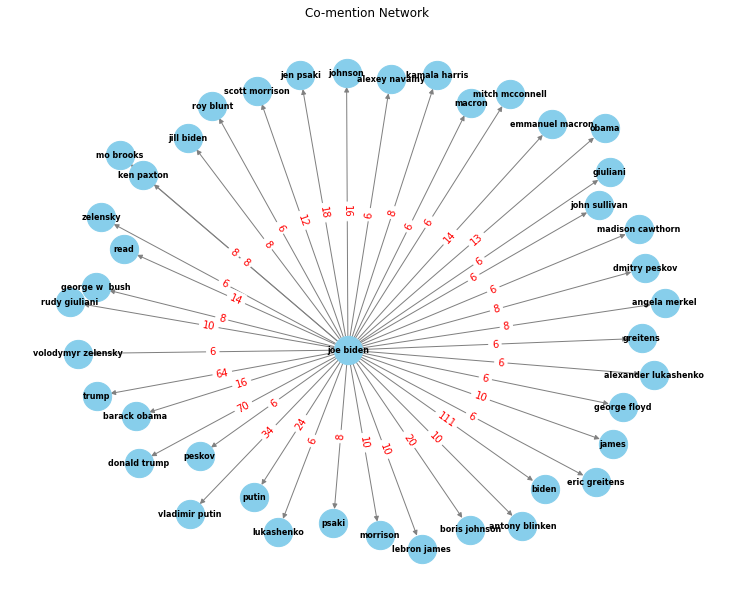

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

newsmakers = nx.DiGraph()

def co_mention_graph(df, person, cutoff):
    sample_df = df.loc[df['count']>cutoff]
    sample_df = sample_df.loc[sample_df["named_entity_x"]== person]

    for index, row in sample_df.iterrows():
        newsmakers.add_edge(row['named_entity_x'], row['named_entity_y'], weight=row['count'])

    pos = nx.spring_layout(newsmakers)  # You can change the layout algorithm as per your preference
    edge_labels = {(n1, n2): d['weight'] for n1, n2, d in newsmakers.edges(data=True)}

    plt.figure(figsize=(10, 8))
    nx.draw(newsmakers, pos, with_labels=True, font_size=8, node_size=800, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray')
    nx.draw_networkx_edge_labels(newsmakers, pos, edge_labels=edge_labels, font_color='red')

    plt.title('Co-mention Network')
    plt.show()

    return newsmakers
co_mention_graph(cooccurrence_counts,'joe biden', 5)

Next we can use plotly to display the graph in a browser as an HTML file. This gives us some addtional options for customization. If we use this in the final application we will try to expand functionality.

In [ ]:
# Below is modified from this project: https://github.com/rweng18/midsummer_network/blob/master/midsummer_graph.ipynb

pos = nx.spring_layout(newsmakers)
pos

{'joe biden': array([0.03825063, 0.04922646]),
 'alexander lukashenko': array([ 0.73746118, -0.68359115]),
 'alexey navalny': array([0.79501369, 0.56444413]),
 'angela merkel': array([-0.65161172, -0.66266272]),
 'antony blinken': array([-0.5597239,  0.8224885]),
 'barack obama': array([-0.69743091,  0.59182689]),
 'biden': array([ 0.93943885, -0.31158174]),
 'boris johnson': array([-0.40892275,  0.88994725]),
 'dmitry peskov': array([1.        , 0.00935556]),
 'donald trump': array([-0.25364063,  0.91341139]),
 'emmanuel macron': array([0.67580644, 0.68607215]),
 'eric greitens': array([-0.10301756,  0.97108664]),
 'george floyd': array([-0.84982377,  0.52879442]),
 'george w  bush': array([ 0.34568147, -0.97243191]),
 'giuliani': array([0.93373864, 0.4725172 ]),
 'greitens': array([-0.79538786, -0.17259642]),
 'james': array([-0.27620378, -0.85910378]),
 'jen psaki': array([0.19861962, 0.98342712]),
 'jill biden': array([-0.73314327,  0.74573627]),
 'john sullivan': array([0.34136421

In [ ]:
def make_edge(x, y, text, width):

    '''Creates a scatter trace for the edge between x's and y's with given width

    Parameters
    ----------
    x    : a tuple of the endpoints' x-coordinates in the form, tuple([x0, x1, None])

    y    : a tuple of the endpoints' y-coordinates in the form, tuple([y0, y1, None])

    width: the width of the line

    Returns
    -------
    An edge trace that goes between x0 and x1 with specified width.
    '''
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')

In [ ]:
edge_trace = []
for edge in newsmakers.edges():

    if newsmakers.edges()[edge]['weight'] > 0:
        person= edge[0]
        person_2 = edge[1]

        x0, y0 = pos[person]
        x1, y1 = pos[person_2]

        text   = person + '--' + person_2 + ': ' + str(newsmakers.edges()[edge]['weight'])

        trace  = make_edge([x0, x1, None], [y0, y1, None], text,
                           0.3*newsmakers.edges()[edge]['weight']**1)

        edge_trace.append(trace)

In [ ]:
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 10,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         line  = None))

for node in newsmakers.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['text'] += tuple(['<b>' + node + '</b>'])

In [ ]:
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)


fig = go.Figure(layout = layout)

for trace in edge_trace:
    fig.add_trace(trace)

fig.add_trace(node_trace)

fig.update_layout(showlegend = False)

fig.update_xaxes(showticklabels = False)

fig.update_yaxes(showticklabels = False)

fig.show()
py.plot(fig, filename='newsmakers_network.html')

'newsmakers_network.html'

## 4. Personal Statement

1. Pete Stewart- Created Section 1 notebook above.

2. Shubhkirti Prasad - Researched methods other than the ones used by Pete to find the most optimal way for NER processing for our data. (Section 2 implementation)

3. Glen Colletti - Attempted to mitigate issues in the entity list from section 1, mooted by spacy implmentation in section 2. Assisted Pete with editing of section 1.